# DS 3000 HW 9 $\color{red}{\text{SOLUTIONS}}$

Due: Sunday Aug 4th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

In [20]:
# below are all the modules you will need on this homework
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

## Part 1: Probability and odds (20 points)

One of the data we have seen in this course is `ICUAdmissions.csv` file. Patients admitted to intensive care units (ICUs) are very ill, either from a serious medical event (e.g. respiratory failure from asthma) or from trauma (e.g, traffic accident). Can patient features available at admission be used to estimate the probability of survival to hospital discharge?
		
- The dataset contains information about patient characteristics at admission, such as heart rate, diagnosis, and kidney function. Also, there are treatment information, like whehther CPR is used on the patient. 
- The variable `Status` is a factor variable with labels `Died` and `Lived`, corresponding to the levels `1` for death before discharge and `0` survival to discharge.

Here is a summary for the data when we compare whether they survived from the ICU and whether there is CPR being used on the patient: 

|       | No  | Yes | Sum |
|-------|-----|-----|-----|
| Died  | 33  | 7   | 40  |
| Lived | 154 | 6   | 160 |
| Sum   | 187 | 13  | 200 |

Calculate following values (keep 3 decimals): 

- The probability that a patient died
- The probability that a patient died without CPR
- The probability that a patient died with CPR
- The odds that a patient died without CPR
- The odds that a patient died with CPR


In the end, also use your own words to explain how probability and odds are related. 

$\color{red}{\text{Question 1 Answers}}$

P(died): 40/200 = 0.200

P(Died without CPR): 33/200 = 0.165

P(Died with CPR): 7/200 = 0.035

Odds(Died without CPR): 33/154 = 0.214

Odds(Died with CPR): 7/6 = 1.167

Both probablity and odds are related because they both are ways of presenting an event occuring, however the way they compare is different. Probablity is the ratio of favorable outcomes compared to the total numbers of outcomes while odds is the ratio of favorable outcomes compared to non favorable outcomes.


## Part 2: Fit a logistics regression (40 points)

Now let's look at another medical data which logistics regression may be useful. This dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The features in the data includes radius, texture, perimeter, area, smoothness, compactness, concavity, etc, and the target is the diagnosis (benign or malignant).

Fit a logistics regression to predict the `target`. Use all the other features as the X. Implement with a 5-fold cross validation and show the confusion matrix plot. You can use 0.5 as the boundary to decide whether the cancer is benign(1) or malignant(0). 

In [21]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


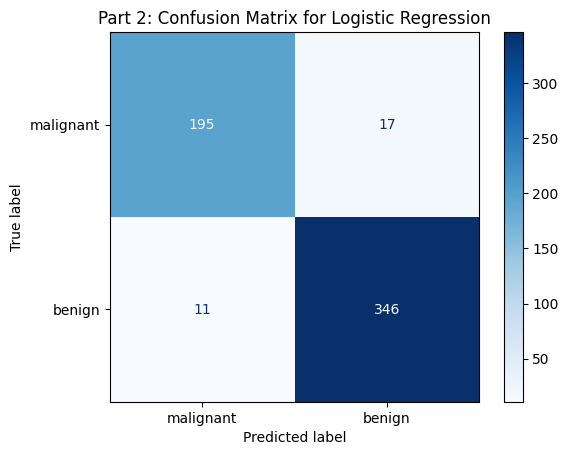

In [22]:
# load datasets
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# logistic regression with 5-fold cross-validation
y_pred = cross_val_predict(LogisticRegression(max_iter=10000), X, y, cv=5)

# FCreating the Matrix
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names).plot(cmap=plt.cm.Blues)
plt.title('Part 2: Confusion Matrix for Logistic Regression')
plt.show()

## Part 3: Combine logistics regression and polynomial features (40 points)

In this data, a lot of the features does have a direct relationship with the target value. Let's only look at `mean texture` and `mean compactness`. 

- Take out these two features, and generate a polynomial matrix with degree 2. Print the first row of the data. How many values you have?
- Read the [function description](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) There is an attribute called get_feature_names_out(). Run it and get the names for the polynomial matrix
- Generate another polynomial matrix with degree = 3. Include the names of the polynomial terms to the polynomial matrix (You may need to convert it back to a pandas data frame) and then fit the full data to it. Show the summary table for the model. 